In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
from keras.utils import np_utils
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# raw_ds_path = r'F:\Artificial Intelligence\Datasets\Drowsiness Detection Dataset\train' 
raw_ds_path = r'F:\Artificial Intelligence\Deep Learning\Drowsiness Detection\Eye Detection\validation'
data, target = [], []

In [3]:
sub_dirs = os.listdir(raw_ds_path)
sub_dirs

['close', 'open']

In [4]:
class_labels = {}
label = 0

for dir in sub_dirs:
    class_labels[dir] = label
    label += 1

class_labels

{'close': 0, 'open': 1}

In [5]:
for dir in sub_dirs:
    ds_class_path = os.path.join(raw_ds_path, dir)
    img_files = os.listdir(ds_class_path)

    for file in img_files:
        img_file_path = os.path.join(ds_class_path, file)
        img = cv2.imread(img_file_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(gray_img, (48, 48))
        
        data.append(res_img)
        target.append(class_labels[dir])

data = np.array(data)
target = np.array(target)

print(data.shape)
print(target.shape)

(379, 48, 48)
(379,)


In [6]:
data = data / 255.0

In [7]:
data = np.reshape(data, (data.shape[0], data.shape[1], data.shape[2], 1))
target = np_utils.to_categorical(target)

In [8]:
data.shape, target.shape

((379, 48, 48, 1), (379, 2))

In [9]:
np.save('../numpy/validation_data.npy', data)
np.save('../numpy/validation_target.npy', target)

In [10]:
validation_data = np.load("../numpy/validation_data.npy")
validation_target = np.load("../numpy/validation_target.npy")

In [11]:
model = Sequential()

model.add(Conv2D(128, (5, 5), input_shape=(48, 48, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [12]:
model.load_weights('../models/best_val_loss_model.h5')

In [13]:
predictions = model.predict(validation_data)

In [14]:
confusion = confusion_matrix(
    np.argmax(validation_target, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[192   0]
 [  5 182]]


<AxesSubplot:xlabel='predicted', ylabel='actual'>

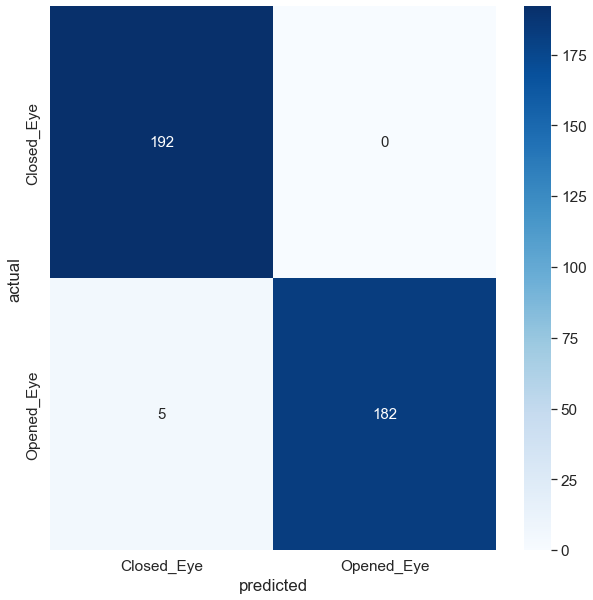

In [15]:
labels = ['Closed_Eye', 'Opened_Eye']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")